In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Environment Motor\n°OoO_FXCM_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Environment Motor
°OoO_FXCM_Oo0°
LumberJack Jyss 5779(c)


In [3]:
print('Importing librairies...')
import fxcmpy
print('version fxcmpy :',fxcmpy.__version__)
import time
import numpy as np
import pandas as pd
import datetime as dt
import talib
from zigzag import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('seaborn')
%matplotlib inline
#import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix

print('Librairies imported')

Importing librairies...
version fxcmpy : 1.2.4


Using TensorFlow backend.


Librairies imported


In [4]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [5]:
TOKEN = 'e053ac1597cef331df9429ac8151100ea9f1c411'
server = 'demo'

# minutes: 'm1' , 'm5' , 'm15' , 'm30' 
# hours: 'H1' , 'H2', 'H3', 'H4', 'H6' 'H8'
# one day: 'D1'
# one week: 'W1'
# one month: 'M1'

period = 'm1'
number = 10000
# Time Windows
# start = dt.datetime(2017, 7, 15)
# stop = dt.datetime(2017, 8, 1)
# con.get_candles('EUR/USD', period='D1',start=start, stop=stop)

In [6]:
tmps1=time.time()
print('Connecting server...')
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error',server= server)
if con.is_connected():
    print('Connection established for',con.get_account_ids(),' - Mode :',server)
else:
    print('Not connected')
tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'secondes')

Connecting server...


W0612 16:14:54.791428 4658099648 fxcmpy.py:222] Default account set to 1147539, to change use set_default_account().


Connection established for [1147539]  - Mode : demo
executed in = 37.130000 secondes


In [7]:
#instruments = con.get_instruments()

In [8]:
#con.get_accounts().T

In [9]:
tmps1=time.time()
df = con.get_candles('SPX500', period=period,number = number)
data = pd.DataFrame()
data['Date'] = df.index
df.reset_index(inplace=True,drop=True)
data['Open'] = df['askopen']
data['High'] = df['askhigh']
data['Low'] = df['asklow']
data['Close'] = df['askclose']
#data = data[['Date'] + data.columns[:].tolist()]
tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'secondes')

executed in = 2.360000 secondes


In [10]:
data.head()

,Date,Open,High,Low,Close
0,2019-06-03 06:28:00,2739.60,2739.90,2739.60,2739.76
1,2019-06-03 06:29:00,2739.76,2739.78,2739.35,2739.50
2,2019-06-03 06:30:00,2739.50,2740.10,2739.50,2740.10
3,2019-06-03 06:31:00,2740.10,2740.58,2739.85,2740.00
4,2019-06-03 06:32:00,2740.00,2740.26,2739.85,2740.10


In [11]:
tmps1=time.time()
print('GOLEM Initialization...')
rsi = talib.RSI(data['Close'],timeperiod=2)
upper, middle, lower =  talib.BBANDS(data['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(data['Close'],timeperiod=5)
sma8 = talib.SMA(data['Close'],timeperiod=8)
sma10 = talib.SMA(data['Close'],timeperiod=10)
sma12 = talib.SMA(data['Close'],timeperiod=12)
sma15 = talib.SMA(data['Close'],timeperiod=15)
sma30 = talib.SMA(data['Close'],timeperiod=30)
sma35 = talib.SMA(data['Close'],timeperiod=35)
sma40 = talib.SMA(data['Close'],timeperiod=40)
sma45 = talib.SMA(data['Close'],timeperiod=45)
sma50 = talib.SMA(data['Close'],timeperiod=50)

delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

X = data['Close']
pivots = peak_valley_pivots(X.values, 0.001, -0.001)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]

peak = []
valley = []

for i in range(0,data.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(pivots[i])
    else:
        peak.append(0)
        valley.append(0)
        
bbdelta = upper - middle
price_bolup = data['Close'] - lower
price_bolow = data['Close'] - upper

rsi5_list = []
rsi95_list = []
for i in range(0,data.shape[0]):
    try:
        rsi95_list.append(90 - rsi[i])
        rsi5_list.append(rsi[i] - 10)
    except:
        rsi95_list.append(0)
        rsi5_list.append(0)
        
varop_spy = data['Open'] - data['Close']
varhl_spy = data['High'] - data['Low']

data['Varop_Spy'] = varop_spy
data['Varhl_spy'] = varhl_spy
data['RSI'] = rsi
data['95 - RSI'] = np.array(rsi95_list)
data['RSI - 5'] = np.array(rsi5_list)

data['BBD_Delta_Up'] = bbdelta

data['delta5_8'] = delta5_8
data['delta8_10'] = delta8_10
data['delta10_12'] = delta10_12
data['delta12_15'] = delta12_15
data['delta15_30'] = delta15_30
data['delta30_35'] = delta30_35
data['delta35_40'] = delta35_40
data['delta40_45'] = delta40_45
data['delta45_50'] = delta45_50

data['Peaks'] = abs(np.array(peak))
data['Valley'] = abs(np.array(valley))

tsf = talib.TSF(data['Close'],timeperiod=14)

delta_tsf = data['Close'] - tsf
data['delta_tsf'] = tsf


forosc = []
forosc.append(0)
for i in range(1,data.shape[0]):
    try:
        forosc.append((data.iloc[i,4] - tsf[i-1])*100/data.iloc[i,4])
    except:
        forosc.append(0)

data['Forcast Oscillator'] = (forosc)

target_up = []
target_down = []

for i in range(0,data.shape[0]-5):
    
    if (data.iloc[i+1,5] * data.iloc[i,5]) < 0 :
        if (data.iloc[i+1,4] - data.iloc[i,4]) > 0.02 : #or (df.iloc[i+1,4] - df.iloc[i,3]) > 30:
            target_up.append(1)
            target_down.append(0)
        elif (data.iloc[i+1,4] - data.iloc[i,4]) < -0.01 : #or (df.iloc[i+1,4] - df.iloc[i,2]) < -30:
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)

data['target_up'] = target_up  
data['target_down'] = target_down

data['target_value'] = data['Close']
data = data.drop(['Open','High','Low','Close'],axis=1)

print('GOLEM begins Computing...')

delta = round(data.shape[0])
bloc1 = round(delta*0.80)
bloc2 = delta - bloc1
print("# of periods : ",delta)
print('On 80% - 20% slash : ')
print('Bloc 1 : ',bloc1,'\nBloc 2 :',bloc2,' periods ')
print('First period :',data.iloc[0,0])
print('Split period :',data.iloc[bloc1-1,0])
print('Last period :',data.iloc[data.shape[0]-1,0])


X = data.iloc[:,1:-3]
y_up = data.iloc[:,-3].values
y_down = data.iloc[:,-2].values

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y_up = np.array(y_up).reshape(-1,1)
y_down = np.array(y_down).reshape(-1,1)

Xtrain = X[:bloc1,:]
Xtest = X[bloc1:,:]
ytrain_up = y_up[:bloc1,:]
ytest_up = y_up[bloc1:,:]
ytrain_down = y_down[:bloc1,:]
ytest_down = y_down[bloc1:,:]

seed = 770
np.random.seed(seed)

ytrain_up = ytrain_up.reshape(ytrain_up.shape[0],)
ytrain_down = ytrain_down.reshape(ytrain_down.shape[0],)

Xtrain = Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1])

model_up = Sequential()
# Add an input layer 
model_up.add(Dense(23, activation='relu'))
# Add one hidden layer 
model_up.add(Dense(50, activation='relu'))
# Add an output layer 
model_up.add(Dense(1, activation='sigmoid'))

model_down = Sequential()
# Add an input layer 
model_down.add(Dense(23, activation='relu'))
# Add one hidden layer 
model_down.add(Dense(50, activation='relu'))
# Add an output layer 
model_down.add(Dense(1, activation='sigmoid'))

print('Processing move_up')
model_up.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])
                   
history_up = model_up.fit(Xtrain, ytrain_up,epochs=50, batch_size=32, verbose=0)

print('Processing move_down')
model_down.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])
                   
history_down = model_down.fit(Xtrain, ytrain_down,epochs=50, batch_size=32, verbose=0)

print('Computing done')

train_acc_up = model_up.evaluate(Xtrain, ytrain_up,verbose=1)
train_acc_down = model_down.evaluate(Xtrain, ytrain_down,verbose=1)

yhat_up = model_up.predict_classes(Xtest)
yhat_down = model_down.predict_classes(Xtest)

score_up = model_up.evaluate(Xtest, ytest_up,verbose=1)
score_down = model_down.evaluate(Xtest, ytest_down,verbose=1)

predict_up = model_up.predict(Xtest)
predict_down = model_down.predict(Xtest)

print('conf_mat_up /n',confusion_matrix(ytest_up, yhat_up))
print('conf_mat_down /n',confusion_matrix(ytest_down, yhat_down))

resultats = pd.DataFrame()
resultats['Date'] = data.iloc[-bloc2:,0]
resultats['Move Up'] = yhat_up
resultats['Confiance up'] = (predict_up)*100
resultats['Move Down'] = yhat_down
resultats['Confiance Down'] = (predict_down)*100
resultats['Actual'] = data['target_value']
print('Ready to go')
tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'secondes')

GOLEM Initialization...
GOLEM begins Computing...
# of periods :  10000
On 80% - 20% slash : 
Bloc 1 :  8000 
Bloc 2 : 2000  periods 
First period : 2019-06-03 06:28:00
Split period : 2019-06-11 03:40:00
Last period : 2019-06-12 14:14:00
Processing move_up
Processing move_down
Computing done
2000/2000 [==============================] - 0s 12us/step
conf_mat_up /n [[1592    0]
 [ 408    0]]
conf_mat_down /n [[1577    0]
 [ 423    0]]
Ready to go
executed in = 23.390000 secondes


executed in = 0.060000 secondes


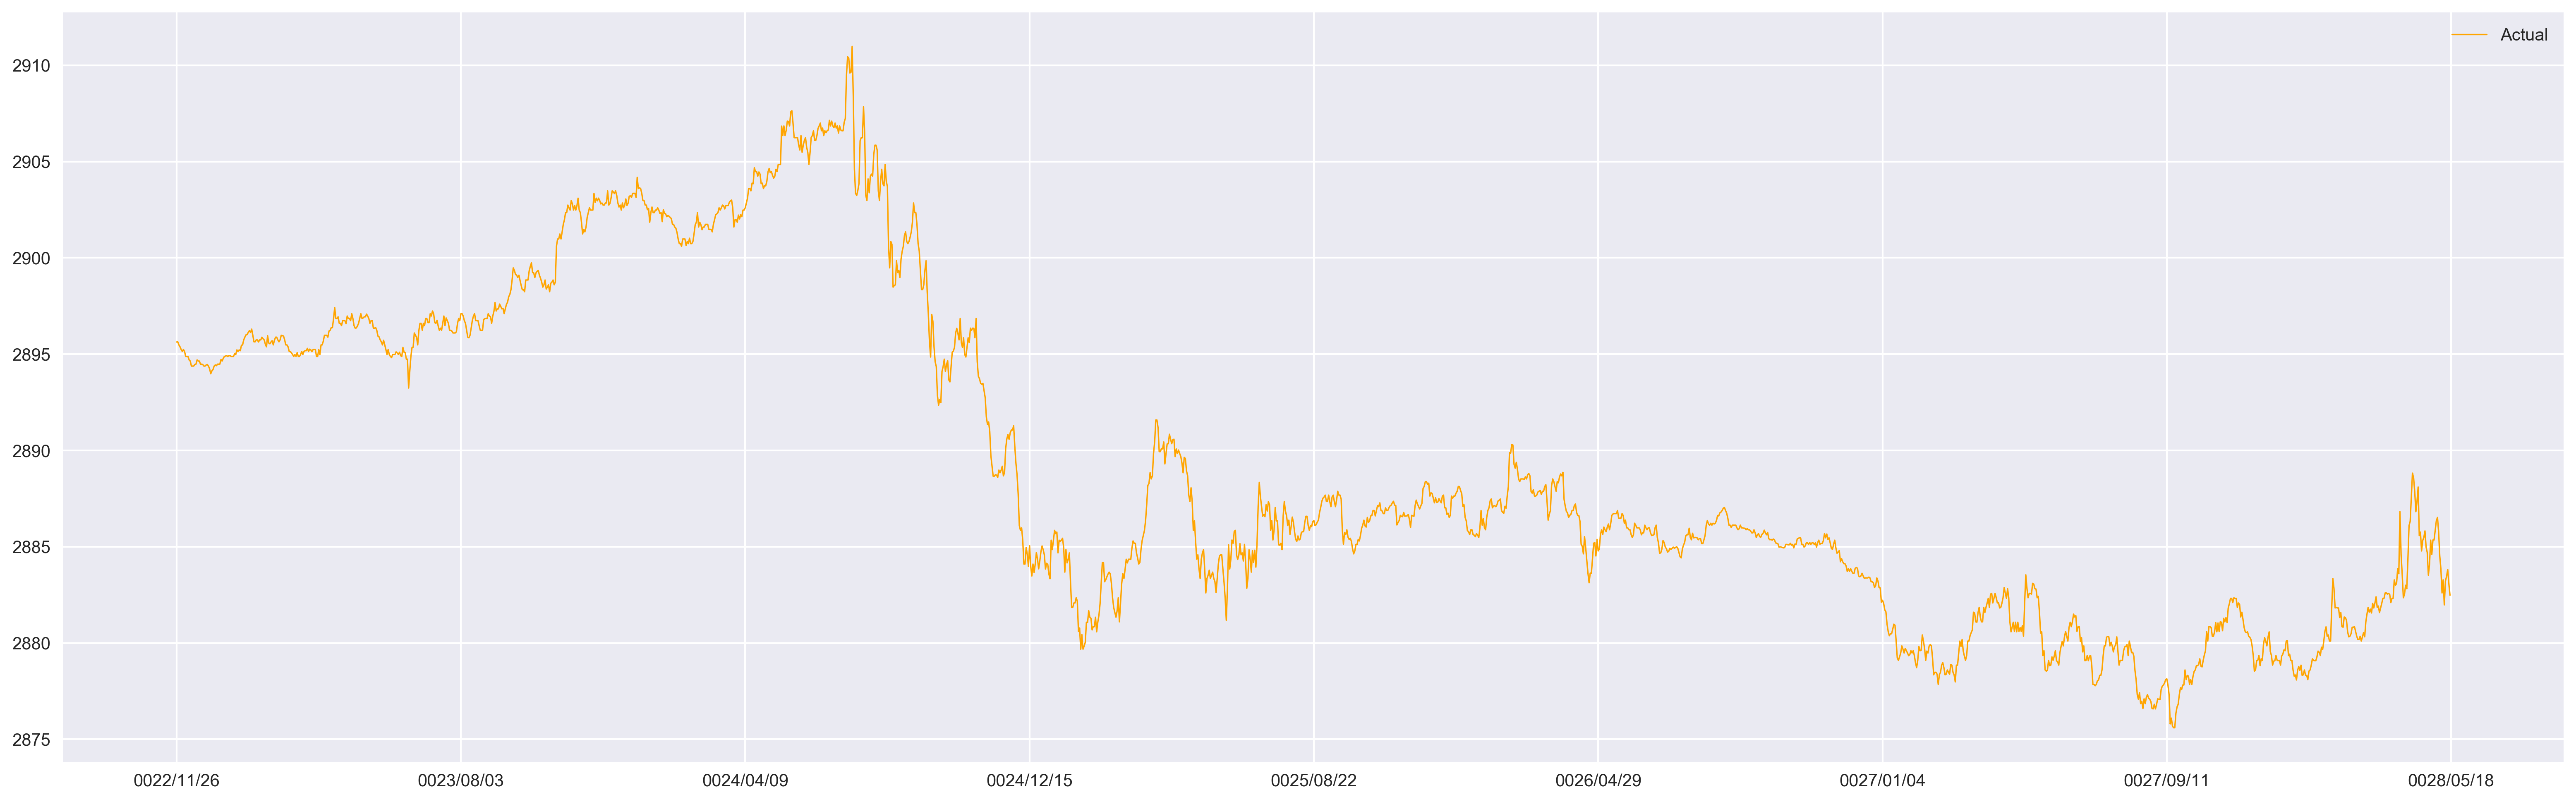

In [12]:
tmps1=time.time()
plt.figure(figsize=(26,8),dpi=300)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.plot(resultats['Actual'],color='orange',lw=0.8)
a = -1
for i in range(0,len(resultats)):
    a+=1
    if resultats.iloc[a,1] == 1:
        plt.scatter(x=resultats.index[i],y=resultats.iloc[i,5],c='g',marker='o')
    elif resultats.iloc[a,3] == 1:
        plt.scatter(x=resultats.index[i],y=resultats.iloc[i,5],c='r',marker='o')
        
plt.legend()
tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'secondes')

executed in = 0.070000 secondes


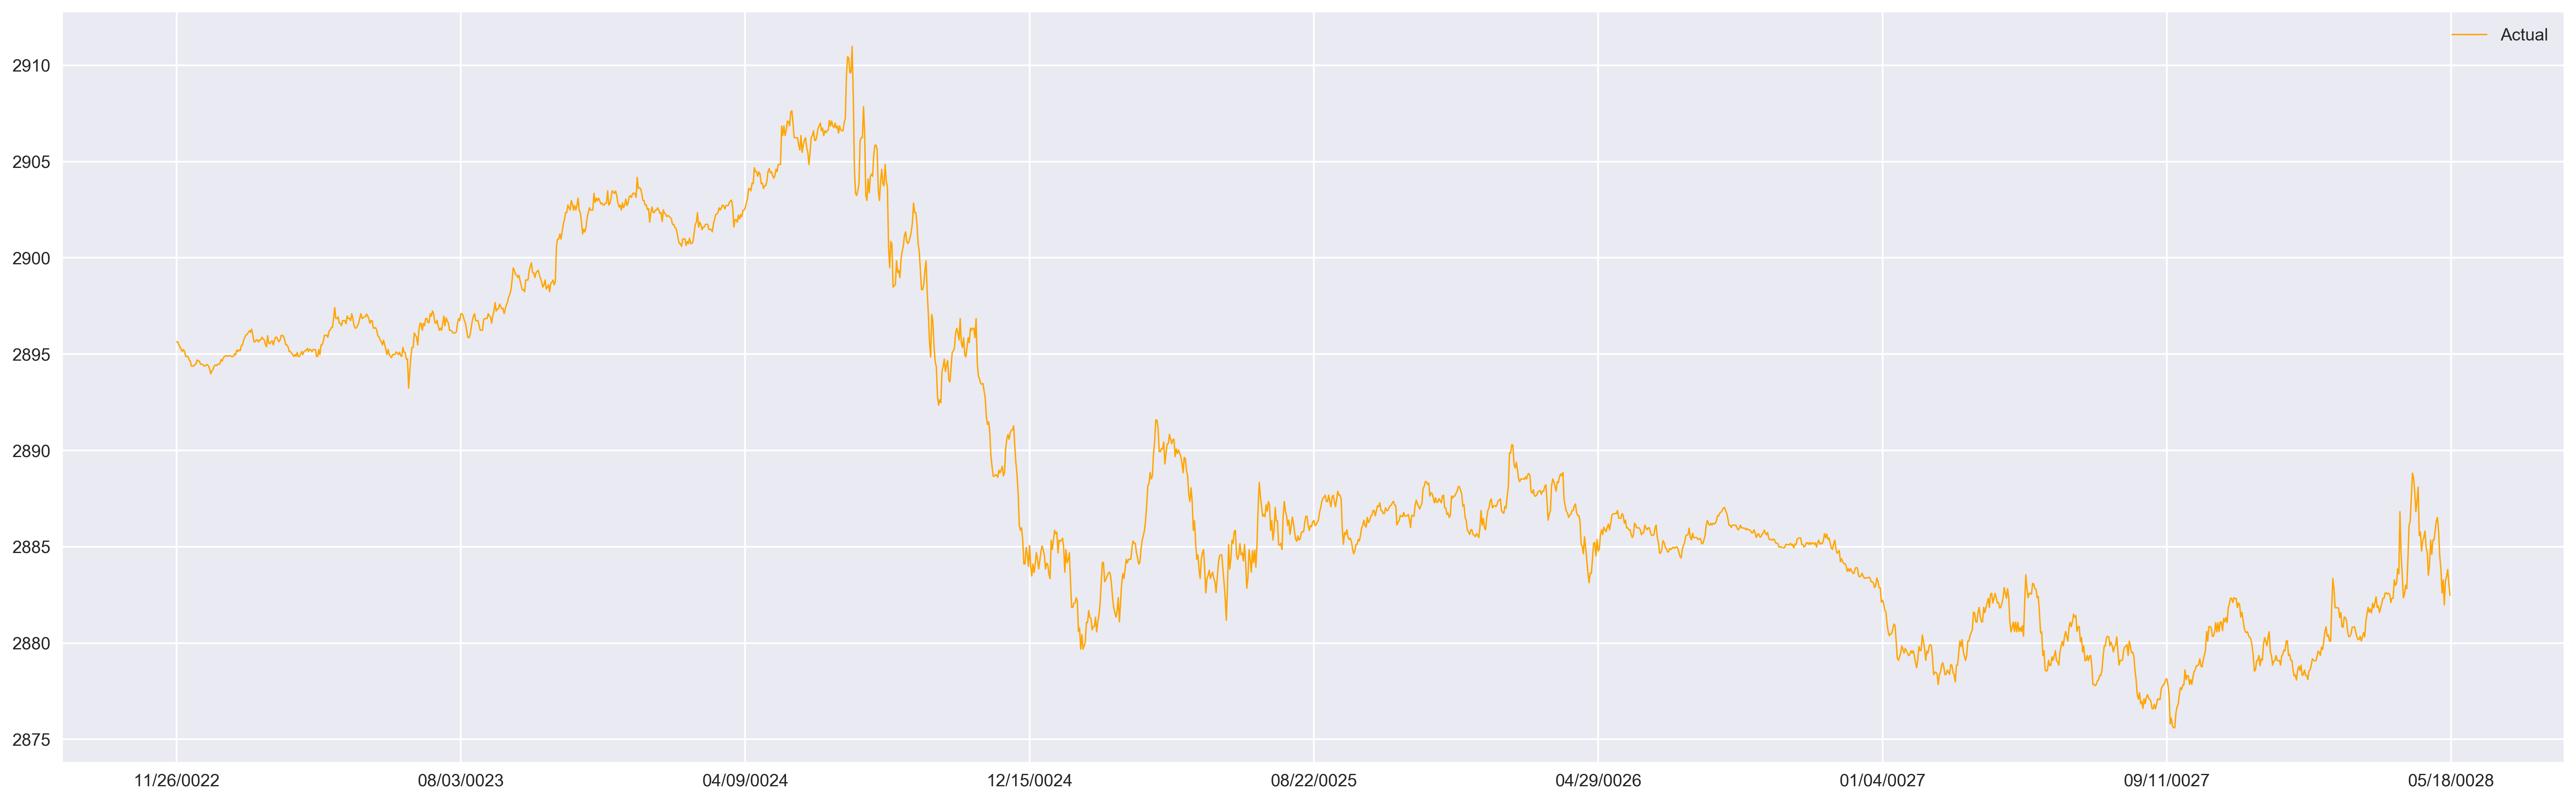

In [13]:
tmps1=time.time()
plt.figure(figsize=(26,8),dpi=300)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.plot(resultats['Actual'],color='orange',lw=0.8)
a = -1
for i in range(0,len(resultats)):
    a+=1
    if resultats.iloc[a,1] == 1:
        plt.text(x=resultats.index[i],y=resultats.iloc[i,5]+10,s=(round(resultats.iloc[i,2]),'%'), horizontalalignment = 'center', verticalalignment = 'center',
                bbox=dict(facecolor='green', alpha=0.5))
    elif resultats.iloc[a,3] == 1:
        plt.text(x=resultats.index[i],y=resultats.iloc[i,5]+10,s=(round(resultats.iloc[i,4]),'%'), horizontalalignment = 'center', verticalalignment = 'center',
                bbox=dict(facecolor='red', alpha=0.5))
plt.legend()
tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'secondes')

executed in = 2.380000 secondes


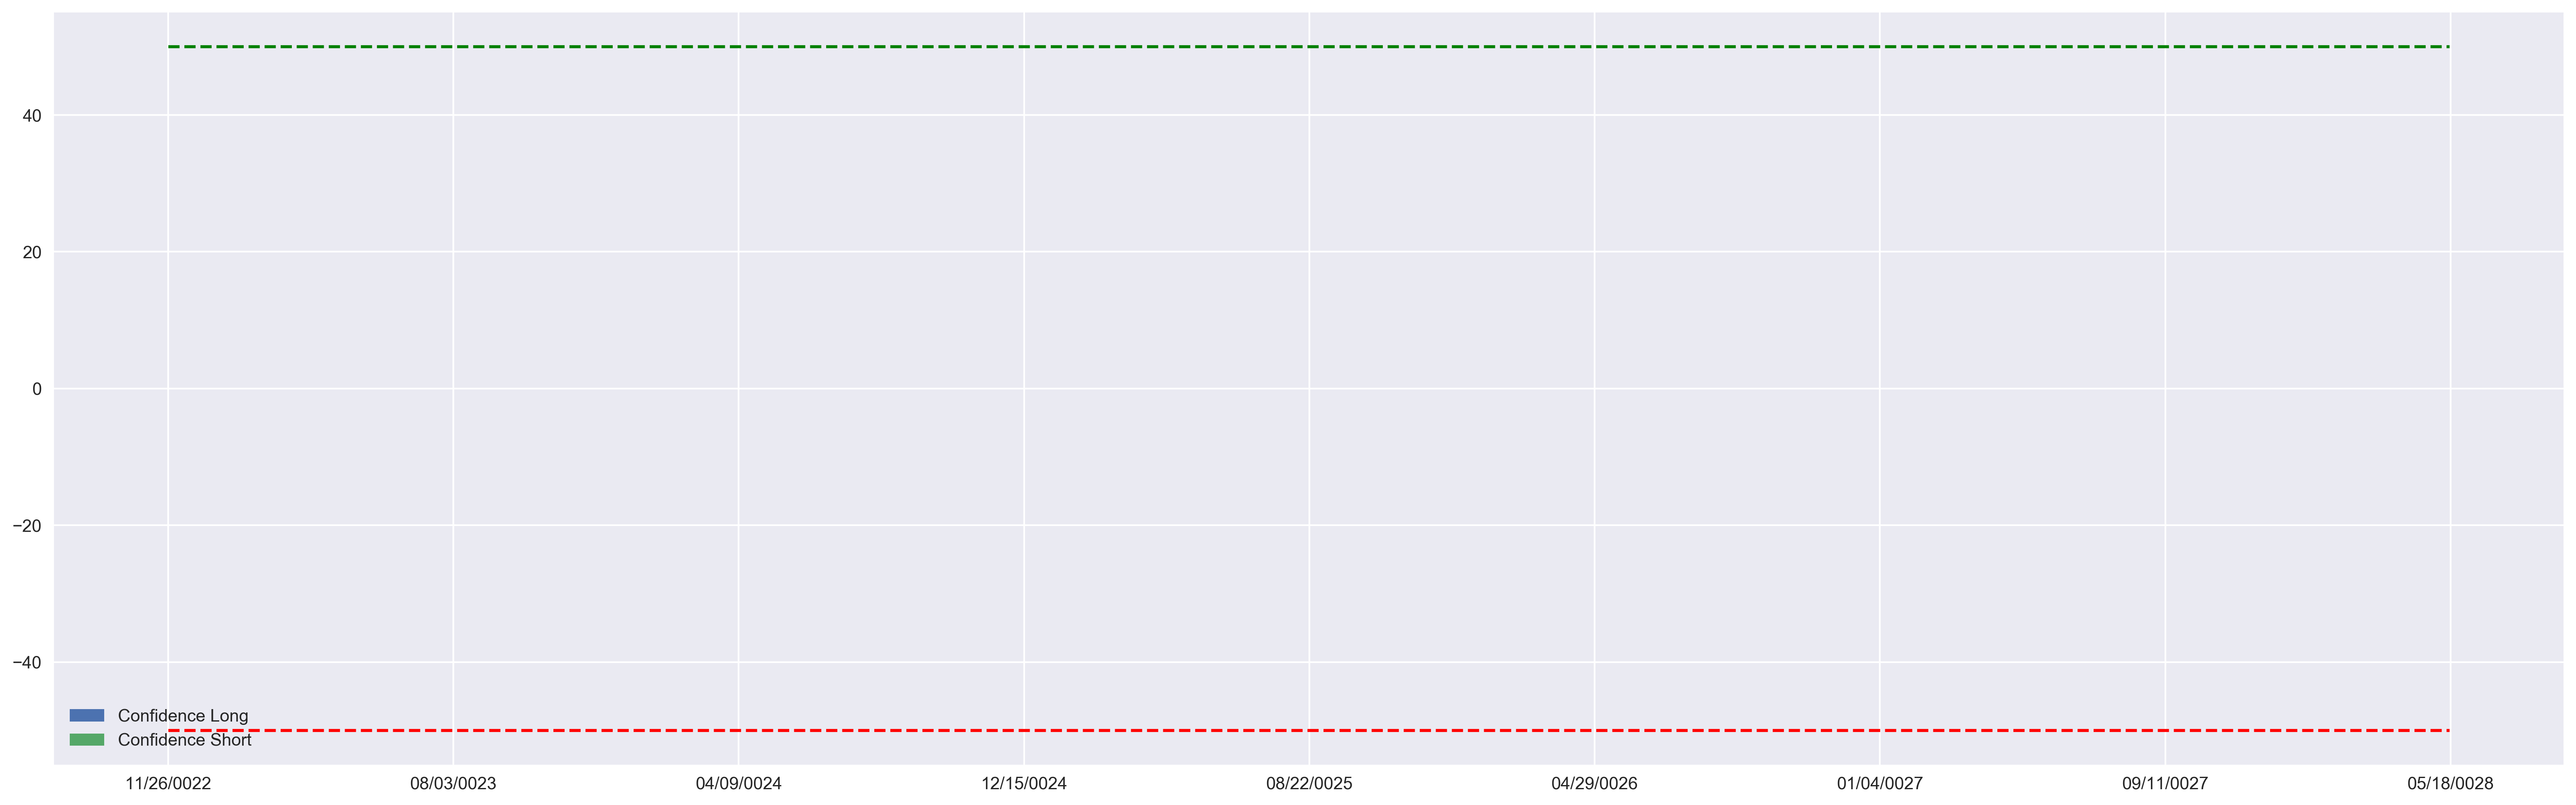

In [14]:
tmps1=time.time()
plt.figure(figsize=(26,8),dpi=300)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.bar(x=resultats.index,height=resultats['Confiance up'],label='Confidence Long')
plt.bar(x=resultats.index,height=-resultats['Confiance Down'],label='Confidence Short')
plt.hlines(xmin=resultats.index[0],xmax=resultats.index[-1],y=50,color='g',linestyles='--')
plt.hlines(xmin=resultats.index[0],xmax=resultats.index[-1],y=-50,color='r',linestyles='--')
plt.legend()
tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'secondes')

In [15]:
data['Valley'].sum(),data['Peaks'].sum(),data['target_up'].sum(),data['target_down'].sum()

(108, 110, 2137, 2226)